   STT   T1   L1   H1   S1   V1   X1   D1   N1   T2  ...  TBM2  TBM3  XL1  \
0    1  7.2  7.3  6.3  7.3  7.0  7.9  7.3  5.5  8.4  ...  7.54  7.01    K   
1    2  5.4  3.9  3.9  4.0  5.4  5.4  5.3  2.8  6.3  ...  5.47  5.07    Y   
2    3  5.6  6.8  7.2  7.5  4.3  7.4  5.8  3.2  5.0  ...  5.38  6.04   TB   
3    4  6.6  6.4  5.3  6.9  5.4  7.3  6.4  5.8  5.1  ...  5.20  6.88   TB   
4    5  6.0  5.0  6.0  7.3  6.5  7.7  7.9  6.1  5.4  ...  6.36  6.99    K   

   XL2  XL3  US_TBM1  US_TBM2  US_TBM3  KQXT  phanlopt1  
0    K    K    2.800    3.016    2.804   0.0        kha  
1   TB   TB    1.876    2.188    2.028   0.0  trungbinh  
2   TB   TB    2.308    2.152    2.416   1.0  trungbinh  
3   TB    K    2.484    2.080    2.752   0.0  trungbinh  
4   TB    K    2.600    2.544    2.796   0.0  trungbinh  

[5 rows x 67 columns]
            T1                    phanlopt1                   
phanlopt1 gioi  kem kha trungbinh      gioi  kem kha trungbinh
T1                                      

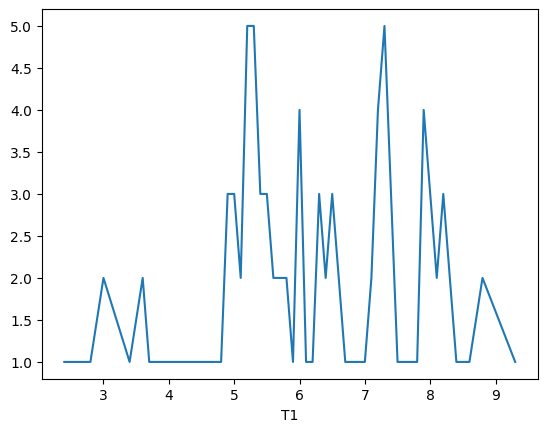

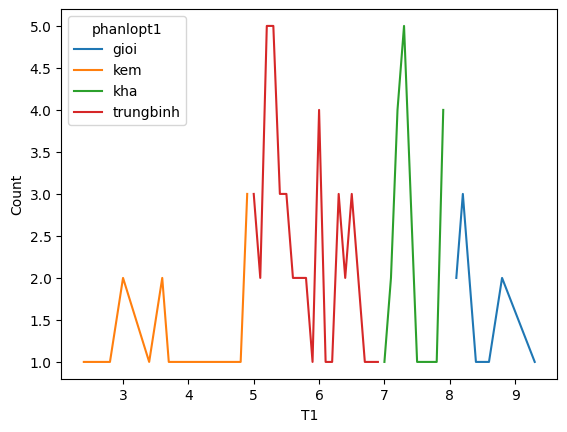

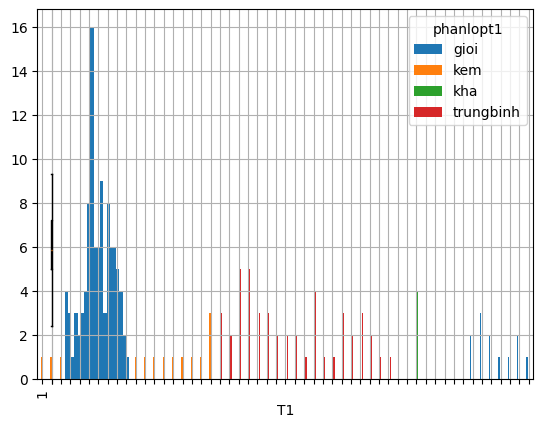

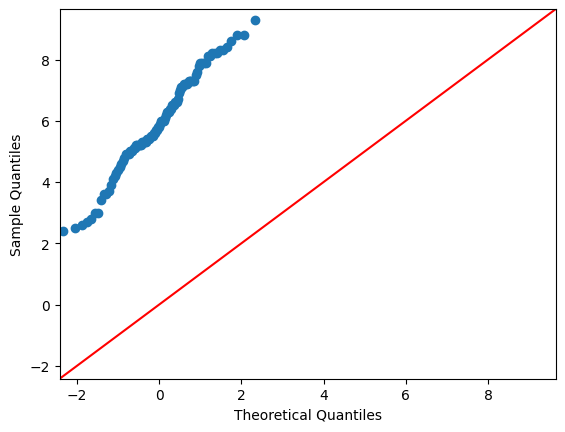

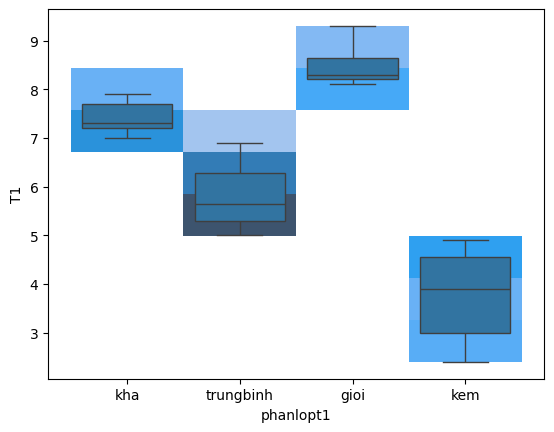

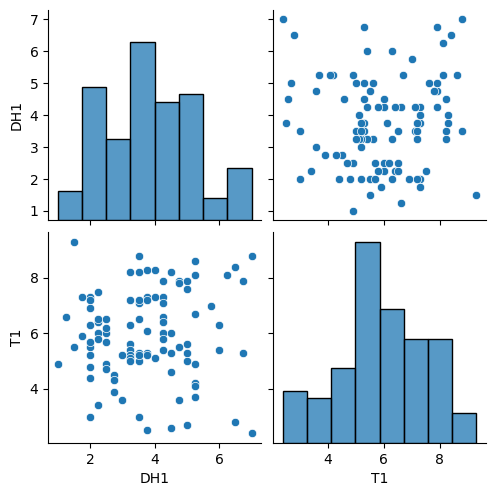

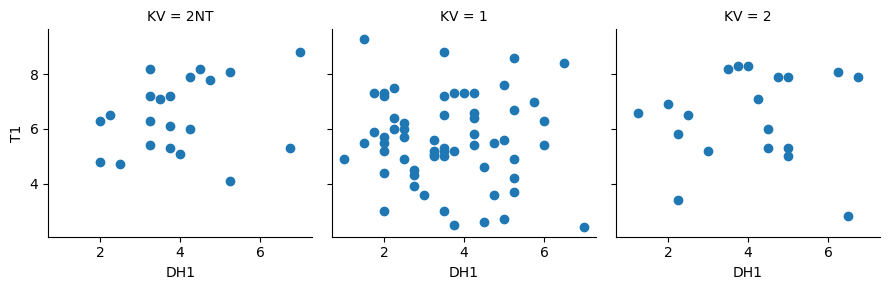

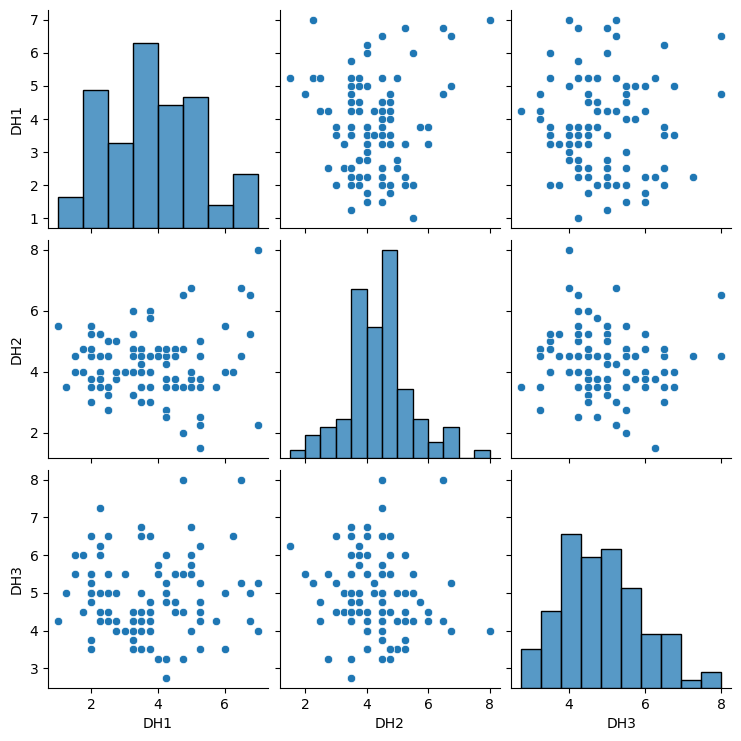

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import seaborn as sns

dftuyensinh = pd.read_csv('processed_dulieuxettuyendaihoc.csv', delimiter=',')
# 1. Vẽ biểu đồ đường Simple cho biến T1
dftuyensinh.groupby('T1')['T1'].count().plot()

# 2. Hãy tạo biến phân loại (phanlopt1) cho môn toán (T1) như sau:
# a. Từ 0 đến dưới 5 = kém (ký hiệu ―k‖)
# b. Từ 5 đến dưới 7 = trung bình (ký hiệu ―tb‖)
# c. Từ 7 đến dưới 8 = khá (ký hiệu ―k‖)
# d. Từ 8 trở lên = giỏi (ký hiệu ―g‖)
dftuyensinh.loc[(dftuyensinh['T1'] < 5), 'phanlopt1'] = 'kem'
dftuyensinh.loc[(dftuyensinh['T1'] >= 5) & (dftuyensinh['T1'] < 7), 'phanlopt1'] = 'trungbinh'
dftuyensinh.loc[(dftuyensinh['T1'] >= 7) & (dftuyensinh['T1'] < 8), 'phanlopt1'] = 'kha'
dftuyensinh.loc[(dftuyensinh['T1'] >= 8), 'phanlopt1'] = 'gioi'

print(dftuyensinh.head(5))

# 3. Lập bảng tần số cho biến phanloait1
dfphanlopt1 = dftuyensinh.groupby(['T1', 'phanlopt1'])[['T1', 'phanlopt1']].count()
unstackphanlopt1 = dfphanlopt1.unstack()
print(unstackphanlopt1.head(10))
unstackphanlopt1['phanlopt1'].plot(ylabel='Count')

# 4. Vẽ biểu đồ đường Multiple Line cho biến T1 được phân loại bởi biến phanlopt1
unstackphanlopt1['phanlopt1'].plot.bar()


# 1. Hãy mô tả và khảo sát phân phối cho biến T1
plt.boxplot(dftuyensinh['T1'])

print(dftuyensinh['T1'].describe())
dftuyensinh['T1'].hist(bins=20)

sm.qqplot(dftuyensinh['T1'], line ='45')
py.show()
# 2. Hãy mô tả và khảo sát phân phối cho biến T1 trên từng nhóm phân lớp (phanlopT1)
sns.boxplot(y='T1', x='phanlopt1', data=dftuyensinh)
sns.histplot(y='T1', x='phanlopt1', data=dftuyensinh)
# 3. Hãy khảo sát tương quan giữa biến DH1 theo biến T1
dh1t1 = dftuyensinh[['DH1','T1']]
sns.pairplot(dh1t1, kind='scatter')
plt.show()
# 4. Hãy khảo sát tương quan giữa biến DH1 theo biến T1 trên từng nhóm khu vực
dh1t1phanlop = dftuyensinh[['DH1', 'T1', 'KV']]
g = sns.FacetGrid(dh1t1phanlop, col='KV')
g.map(plt.scatter, 'DH1', 'T1')
# 5. Hãy khảo sát tương quan giữa các biến DH1, DH2, DH3
dh123 = dftuyensinh[['DH1','DH2','DH3']]
sns.pairplot(dh123, kind='scatter')
plt.show()